
1. load required packages 

2. load calibration files; .poni defining geometry and mask

3. define integrator function



In [2]:
import pyFAI
import baseline
import fabio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pygix as pg
import mplcursors
import baseline

from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy import sparse
from scipy.signal import find_peaks
from scipy.sparse.linalg import spsolve
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator
from plotnine import *#ggplot, aes, geom_line, labs, theme, ggtitle

In [3]:
# load the calibration files and visualise mask
# poni_file = "/home/goughl/Documents/beamtime_data/2204_DLS/processed data/AgBh_calib_2211/AgBh_calib_near_2211.poni"
# calibration = pyFAI.load(poni_file) # this part done in pyFAI-calib2 GUI (see README)

#minerva 2024 data
#poni_file = r"/home/goughl/Documents/beamtime_data/2409_DLS/CALIB/calib_p2mImage1310267_exsitu.poni" 
poni_file = r"/home/goughl/Documents/beamtime_data/2409_DLS/CALIB/calib_p2mImage1309119.poni"

calibration = pyFAI.load(poni_file) 

# mask_file = "/home/goughl/Documents/beamtime_data/2304_DLS/calib/mask_AgBh.edf"
# mask_data = fabio.open(mask_file).data
# #mask_data = 1 - mask_data
# # invert by commenting out this line

# plt.imshow(mask_data, cmap='gray')
# plt.colorbar()
# plt.title("Mask Visualization")
# plt.show()
# black pixels masked, white pixels unmasked, make sure they're the correct way round!! 

In [4]:
# # defining all functions to be used
# # shouldn't need to change these


# integrator function with arguments defined in pyFAI documentation
integrator = AzimuthalIntegrator(
    detector=calibration.detector,
    wavelength=calibration.wavelength,
    dist=calibration.dist,  
    poni1=calibration.poni1,
    poni2=calibration.poni2,
    rot1=calibration.rot1,
    rot2=calibration.rot2,
    rot3=calibration.rot3,
    
)

In [5]:
# #plot the raw tif image

# image = fabio.open("/home/goughl/Documents/beamtime_data/2304_DLS/raw_data/230429-3-MINERVA_DCV5T_HT/long_exposure/p2mImage1019682.tif")  # Replace with the actual path to your image file
# data = image.data  

# vmin = 100  # min intensity value
# vmax = 15000  # max intensity value

# # for long exposure images (t ~ 30 s) vmax ~ 15000
# # for short exposure images (t ~ 3 s) vmax ~ 1000

# plt.imshow(data, cmap='gray', vmin=vmin, vmax=vmax)
# plt.colorbar()
# plt.xlabel('Pixel X')
# plt.ylabel('Pixel Y')
# plt.title('Raw 2D Detector Image')
# plt.show()

In [6]:
# # check you're in the right folder 
# # lists all the files in a directory and puts them in numerical roder

# folder_path = r"/home/goughl/Documents/beamtime_data/2112_ESRF/MAR/ANDREAS/paper"
# files = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename)) and filename.endswith('.edf')]
# #sorted_files = sorted(files, key=lambda x: int(x.split("p2mImage")[1].split(".")[0]))

# # for filename in sorted_files:
# #     print(filename)

# print(files)

In [77]:
# detector_image_file = "/home/goughl/Documents/beamtime_data/2304_DLS/raw_data/230429-3-MINERVA_DCV5T_HT/long_exposure/p2mImage1019682.tif"  # Replace with the path to your detector image file
# detector_image = fabio.open(detector_image_file).data


# mask_file = "/home/goughl/Documents/beamtime_data/2304_DLS/calib/mask_AgBh.edf" # Replace with the path to your mask file
# mask_data = fabio.open(mask_file).data

# inverted_mask = ~mask_data

# # Apply the inverted mask to the detector image
# masked_image = np.where(inverted_mask, detector_image, 0)

# # Set the intensity range (vmin and vmax)
# vmin = 100  # Minimum intensity value
# vmax = 15000  # Maximum intensity value

# # Plot the masked detector image with specified intensity range
# plt.imshow(masked_image, cmap='gray', vmin=vmin, vmax=vmax)
# plt.colorbar()
# plt.title("Masked Detector Image (Inverted Mask)")
# plt.show()

In [78]:
# # plot the integrated data (individual)

# data_file = r"/home/goughl/Documents/beamtime_data/2112_ESRF/MAR/ANDREAS/paper/PSI1400269.edf"
# data = fabio.open(data_file).data
# #data = inverted_mask * data
# # uncomment the line above to mask



# q, I = integrator.integrate1d(data, 1000, unit="q_A^-1", azimuth_range=(235, 255), radial_range=(0, 1.85), polarization_factor=0.99)

# # 235, 255 is out of plane i think??
# # 180, 200 in plane? not 100% sure

# plt.plot(q, I)
# plt.xlabel("q (1/Å)")
# plt.ylabel("Intensity (a.u.)")
# plt.title("1D integration in-plane")
# plt.grid(True)
# plt.show()


In [79]:
# # Define the new region of interest (ROI)
# azimuth_range_roi = (60, 77)
# radial_range_roi = (2.25, 2.75)

# # Integration for the new region
# q_roi, I_roi = integrator.integrate1d(data_roi, 1000, unit="q_A^-1", azimuth_range=azimuth_range_roi, radial_range=radial_range_roi, polarization_factor=0.99)

# # Plotting the new region
# plt.plot(q_roi, I_roi)
# plt.xlabel("q (1/Å)")
# plt.ylabel("Intensity (a.u.)")
# plt.title("1D integration in-plane - Region of Interest")

# # Add gridlines
# plt.grid(True)

# plt.show()

# peaks, _ = find_peaks(I_roi, height=0, threshold=None, distance=None, prominence=None, width=None, wlen=None, rel_height=0.5, plateau_size=None)

# # Check if any peaks were found
# if peaks.size == 0:
#     print("No peaks found in the specified range.")
# else:
#     # Assuming the first peak is the main one, you might need to adapt this based on your data
#     main_peak_position = q_roi[peaks[0]]

#     # Calculate FWHM
#     half_max = I_roi[peaks[0]] / 2.0
#     left_idx = np.where(I_roi[:peaks[0]] >= half_max)[0][-1]
#     right_idx = np.where(I_roi[peaks[0]:] <= half_max)[0][0] + peaks[0]
#     fwhm = right_idx - left_idx

#     print("Peak Position:", main_peak_position)
#     print("FWHM:", fwhm)

# plt.show()

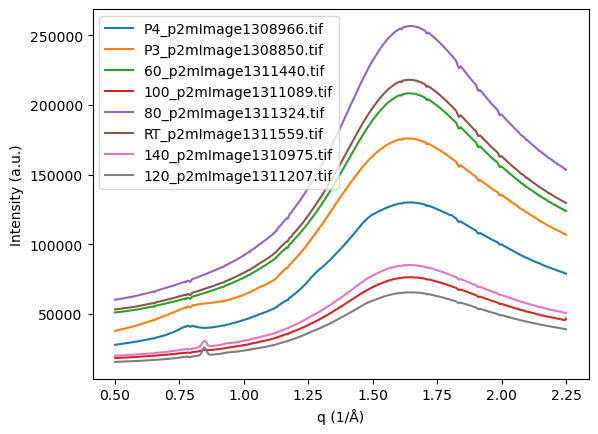

In [7]:
# 1D integrations of all files in a directory
# not normalised

# 2024 minerva data
folder_path = r"/home/goughl/Documents/beamtime_data/2409_DLS/SANS_samples/"
output_folder = r"/home/goughl/Documents/beamtime_data/2409_DLS/SANS_samples/C60_140/int"
# folder_path = r"/home/goughl/Documents/beamtime_data/2409_DLS/for_database/"
# output_folder = r"/home/goughl/Documents/beamtime_data/2409_DLS/for_database/"

qs = []
Is = []
labels = []

start_label = 0
for filename in os.listdir(folder_path):
    if filename.endswith('.tif'):
        data = fabio.open(os.path.join(folder_path, filename)).data
       # data = np.where(inverted_mask, data, 0)
        # can't get the mask to behave properly
        q, I = integrator.integrate1d(data, 1000, correctSolidAngle=True, unit="q_A^-1", azimuth_range=(45, 80), radial_range=(0.5, 2.25), polarization_factor=0.99)
        label = filename # updates label by adding increment on in nm
        qs.append(q)
        Is.append(I)
        labels.append(label)

        # for EA paper in plane is 0,15, OoP 65,80
        
        
        # for SANS paper, used azimuth (180, 200) for in plane
        # (240, 240) for out of plane
        
save = False
# change to true when you want to save the files

if save == True:
    for filename, q, I, label in zip(os.listdir(folder_path), qs, Is, labels):
        data = {'q': q, 'Intensity': I}
        df = pd.DataFrame(data)
        base_filename = os.path.splitext(filename)[0]  
        output_filename = os.path.join(output_folder, f"1D_int_RT_45_80_{label}.csv")
        df.to_csv(output_filename, index=False)

        plt.plot(q, I, label=f"{label}")        
else:
    for q, I, label in zip(qs, Is, labels):
        plt.plot(q, I, label=f"{label}")

plt.xlabel("q (1/Å)")
plt.ylabel("Intensity (a.u.)")
#plt.title("EA out of plane (0 - 45°)")

plt.legend()
plt.show()

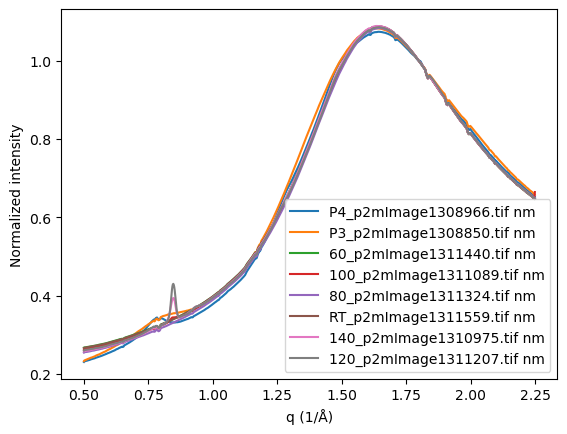

In [8]:
# normalising to a chosen point in q space, where you expect to see nothing

background_q = 1.7# choose a q value where there is only background
bg_range = 0.1# choose a small range of which background_q is the centre to average


normalized_intensities = []
peak_coordinates = []


for i, (q, I) in enumerate(zip(qs, Is)):
    max_peak = min(I[(q > background_q - bg_range) & (q < background_q + bg_range)])
    max_index = np.argmin(I[(q > background_q - bg_range) & (q < background_q + bg_range)])
    q_max_peak = q[(q > background_q - bg_range) & (q < background_q + bg_range)][max_index]

    normalized_intensity = I / max_peak
    normalized_intensities.append(normalized_intensity)
    peak_coordinates.append((q_max_peak, max_peak))

    plt.plot(q, normalized_intensity, label=f"{labels[i]} nm")

plt.xlabel("q (1/Å)")
plt.ylabel("Normalized intensity")
#plt.title("Integration in plane \n  DCV5T:C60")
plt.legend()
plt.show()

# # Print the coordinates of the normalizing peaks
# for i, (q_max_peak, max_peak) in enumerate(peak_coordinates):
#     print(f"Peak {i + 1} coordinates: q = {q_max_peak:.4f}, I = {max_peak:.4f}")


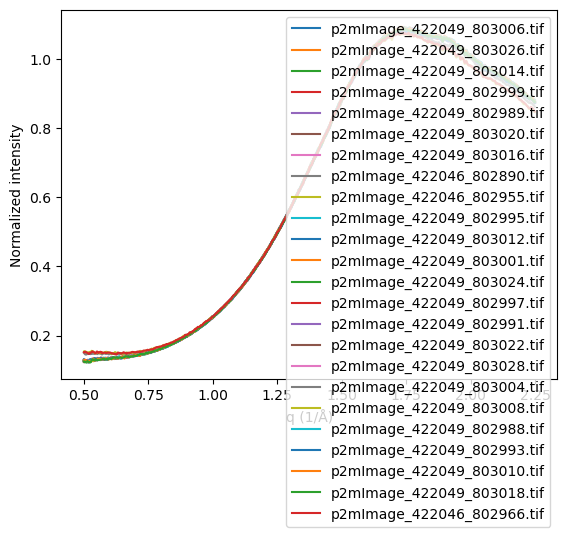

Peak 1 coordinates: q = 1.6051, I = 1191.1547
Peak 2 coordinates: q = 1.6016, I = 1180.9045
Peak 3 coordinates: q = 1.6016, I = 1188.6395
Peak 4 coordinates: q = 1.6016, I = 1147.8751
Peak 5 coordinates: q = 1.6016, I = 1137.4132
Peak 6 coordinates: q = 1.6034, I = 1187.8632
Peak 7 coordinates: q = 1.6016, I = 1187.6715
Peak 8 coordinates: q = 1.6016, I = 1169.2352
Peak 9 coordinates: q = 1.6016, I = 1396.1938
Peak 10 coordinates: q = 1.6016, I = 1148.9656
Peak 11 coordinates: q = 1.6016, I = 1192.4186
Peak 12 coordinates: q = 1.6016, I = 1143.3076
Peak 13 coordinates: q = 1.6016, I = 1184.4298
Peak 14 coordinates: q = 1.6016, I = 1145.0715
Peak 15 coordinates: q = 1.6016, I = 1128.3452
Peak 16 coordinates: q = 1.6016, I = 1183.9668
Peak 17 coordinates: q = 1.6016, I = 1185.3623
Peak 18 coordinates: q = 1.6016, I = 1190.8921
Peak 19 coordinates: q = 1.6016, I = 1194.2050
Peak 20 coordinates: q = 1.6016, I = 1172.4260
Peak 21 coordinates: q = 1.6051, I = 1139.4111
Peak 22 coordinates: q

In [93]:
import csv
import os

# Specify the directory where you want to save the CSV files
save_dir = r"/home/goughl/Documents/EA_paper_working/EA_DCV5T_RT/integrations"


# Make sure the directory exists, if not, create it
os.makedirs(save_dir, exist_ok=True)

# normalising to a chosen point in q space, where you expect to see nothing
background_q = 1.7 # choose a q value where there is only background
bg_range = 0.1 # choose a small range of which background_q is the centre to average

normalized_intensities = []
peak_coordinates = []

for i, (q, I) in enumerate(zip(qs, Is)):
    max_peak = min(I[(q > background_q - bg_range) & (q < background_q + bg_range)])
    max_index = np.argmin(I[(q > background_q - bg_range) & (q < background_q + bg_range)])
    q_max_peak = q[(q > background_q - bg_range) & (q < background_q + bg_range)][max_index]

    normalized_intensity = I / max_peak
    normalized_intensities.append(normalized_intensity)
    peak_coordinates.append((q_max_peak, max_peak))

    # Get the original filename without extension
    original_filename = os.path.splitext(os.path.basename(labels[i]))[0]

    # Save data to CSV with 'normalised' added to the filename
    filename = os.path.join(save_dir, f"1D_DCV5T_RT_45_80_OoP_{original_filename}.csv")
    
    # naming convention: {YYMMDD}_{project}_{sample}_{IP or OoP}_{azimuth_range1}_{azimuth_range2}_{normalised or not}
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['q', 'Intensity'])
        for q_value, intensity in zip(q, normalized_intensity):
            writer.writerow([q_value, intensity])

    plt.plot(q, normalized_intensity, label=f"{labels[i]}")  # Label each dataset with its filename

plt.xlabel("q (1/Å)")
plt.ylabel("Normalized intensity")
#plt.title("Integration in plane \n  DCV5T:C60")
plt.legend()
plt.show()

# Print the coordinates of the normalizing peaks
for i, (q_max_peak, max_peak) in enumerate(peak_coordinates):
    print(f"Peak {i + 1} coordinates: q = {q_max_peak:.4f}, I = {max_peak:.4f}")
